## 1. Business Understanding

AirB&B is a popular vacation rental property platform where individual owners can list their properties for rent. It allows renters to find and rent a property using platform search and payment processing capabilities. 

I analyzed the data for Seattle properties for 12 months between 01/2016 and 01/2017 to answer a hypothetical question. Let's say your friend wants to rent a property that she just inherited and asks you to give her an advice on how to make the property most popular. The popularty will be defined by number of days in the year the propety will be rented. Ideally, she wants the property to be rented out 90% of the time. She wants you to find out what factors contribute to property popularity.

In the below notebook, I will explore those factors and make the conclusions based on the statistical analysis.Specifically, I will answer the following questions:

1. What is the main factor impacting property occupancy rate?
2. How do price and property rating imact the property occupancy?
3. What are additional factors that need to be considered to increase property occupancy?

## 2. Data Understainding

### 2.1. Load the Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date, datetime


import seaborn as sns
%matplotlib inline


### 2.2. Assess the Data

In [5]:
df_listings = pd.read_csv('listings.csv')
df_cal = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')
print('listings dataset: ', df_listings.shape)
print('bookings dataset: ', df_cal.shape)
print('reviews dataset: ', df_reviews.shape)

listings dataset:  (3818, 92)
bookings dataset:  (1393570, 4)
reviews dataset:  (84849, 6)


In [6]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
# How many listings in the calendar? Can we match them?
print('Total listings in the booking ', df_cal['listing_id'].nunique())

Total listings in the booking  3818


In [9]:
# What is the start vs. end date for the booking window? 
print('Start date {0}, end date {1}'.format(df_cal['date'].min(), df_cal['date'].max()))
print('Total num of days covered ', datetime.strptime(df_cal['date'].max(),'%Y-%m-%d') - datetime.strptime(df_cal['date'].min(),'%Y-%m-%d'))

Start date 2016-01-04, end date 2017-01-02
Total num of days covered  364 days, 0:00:00


## 3.  Data Preparation

### 3.1. Clean the Data

In [10]:
# Investigate missing values
missing_stats = {}
num_rows = df_listings.shape[0]
for col in df_listings.columns:
    if (df_listings[col].isnull().sum() > 0):
        missing_stats[col] = df_listings[col].isnull().sum()/num_rows
print(missing_stats)

{'summary': 0.046359350445259295, 'space': 0.14903090623363016, 'neighborhood_overview': 0.27029858564693554, 'notes': 0.42063907805133577, 'transit': 0.24463069669984286, 'thumbnail_url': 0.083813514929282351, 'medium_url': 0.083813514929282351, 'xl_picture_url': 0.083813514929282351, 'host_name': 0.00052383446830801469, 'host_since': 0.00052383446830801469, 'host_location': 0.0020953378732320588, 'host_about': 0.22498690413829231, 'host_response_time': 0.13698271346254584, 'host_response_rate': 0.13698271346254584, 'host_acceptance_rate': 0.20246202200104768, 'host_is_superhost': 0.00052383446830801469, 'host_thumbnail_url': 0.00052383446830801469, 'host_picture_url': 0.00052383446830801469, 'host_neighbourhood': 0.078575170246202197, 'host_listings_count': 0.00052383446830801469, 'host_total_listings_count': 0.00052383446830801469, 'host_has_profile_pic': 0.00052383446830801469, 'host_identity_verified': 0.00052383446830801469, 'neighbourhood': 0.10895756940806706, 'zipcode': 0.0018

In [11]:
# drop columns with >= 90% missing values
threshold = 0.9
outlier_cols = [key for key,val in missing_stats.items() if val > threshold]
print ("Columns with > 90% missing rows: ", outlier_cols)
try:
    df_listings.drop(labels=outlier_cols, axis = 1, inplace=True)
except:
    pass # if we already dropped these columns before
print("after dropping outlier columns ", df_listings.shape)

Columns with > 90% missing rows:  ['square_feet', 'license']
after dropping outlier columns  (3818, 90)


In [12]:
# Define helper functions for data cleaning

def clean_price (x):
    '''Remove $ from the string x or return x unchanged if it is not a string'''
    if isinstance(x, str):
        return (x.replace('$','').replace(',',''))
    return x

def clean_rate (x):
    '''Remove % from the string x or return x unchanged if it is not a string'''
    if isinstance(x, str):
        return (x.replace('%','').replace(',',''))
    return x

def get_years (x):
    '''Return number of years prior to 2016.
    Input should be a string.'''
    if isinstance(x, str):
        return (2016-int(x.split('-')[0]))
    return x

def get_len (x):
    '''Return length of x if it is a string, return nan'''
    if isinstance(x, str):
        return len(x)
    return np.nan

In [13]:
# price needs to be converted to number
df_listings[['price','weekly_price','monthly_price','cleaning_fee','security_deposit']].head()

,price,weekly_price,monthly_price,cleaning_fee,security_deposit
0,$85.00,NaN,NaN,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00",$40.00,$100.00
2,$975.00,NaN,NaN,$300.00,"$1,000.00"
3,$100.00,$650.00,"$2,300.00",NaN,NaN
4,$450.00,NaN,NaN,$125.00,$700.00


In [15]:
'''To clean up the price columns, I will remove '$' sign, convert it to a number and also replace nan with 0 for cleaning fee and security deposit 
'''
price_cols = ['price','weekly_price','monthly_price','cleaning_fee','security_deposit']
for col in price_cols:
    df_listings[col] = df_listings[col].apply(clean_price).astype('float')
    if col in ['cleaning_fee', 'security_deposit']:
        df_listings[col].fillna(value=0, inplace=True)

In [16]:
df_listings[price_cols].head()

,price,weekly_price,monthly_price,cleaning_fee,security_deposit
0,85.0,NaN,NaN,0.0,0.0
1,150.0,1000.0,3000.0,40.0,100.0
2,975.0,NaN,NaN,300.0,1000.0
3,100.0,650.0,2300.0,0.0,0.0
4,450.0,NaN,NaN,125.0,700.0


In [17]:
# Remove % to converto to number
rate_cols = ['host_response_rate','host_acceptance_rate']
for col in rate_cols:
    df_listings[col] = df_listings[col].apply(clean_rate).astype('float')

## 4. Analysis

In [18]:
# Explore numerical columns
df_listings.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3295.000000,3045.000000,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,...,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,94.886798,99.967159,7.157757,7.157757,47.628961,-122.333103,3.349398,...,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,11.866705,1.812201,28.628149,28.628149,0.043052,0.031745,1.977599,...,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,17.000000,0.000000,1.000000,1.000000,47.505088,-122.417219,1.000000,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,98.000000,100.000000,1.000000,1.000000,47.609418,-122.354320,2.000000,...,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,100.000000,100.000000,1.000000,1.000000,47.623601,-122.328874,3.000000,...,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,100.000000,100.000000,3.000000,3.000000,47.662694,-122.310800,4.000000,...,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,100.000000,100.000000,502.000000,502.000000,47.733358,-122.240607,16.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


In [19]:
# Find categorical columns
cat_cols = [col for col in df_listings.columns if df_listings[col].dtypes=='object']
print('Categorical columns: total ', len(cat_cols), cat_cols)

Categorical columns: total  55 ['listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'extra_people', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']


In [20]:
df_listings[cat_cols].head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f


In [21]:
# Drop columns that I don't think will be helpful in this analysis 
to_drop = ['space','neighborhood_overview','listing_url', 'last_scraped', 'name','summary','description', 'experiences_offered','notes','thumbnail_url',\
           'medium_url','picture_url','host_url','xl_picture_url','host_name','host_location','host_about',\
          'host_thumbnail_url','host_picture_url','street','jurisdiction_names','market']
for col in to_drop:
    try: cat_cols.remove(col)
    except:
        pass
cat_cols

['transit',
 'host_since',
 'host_response_time',
 'host_is_superhost',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [22]:
# convert dates to intervals 
df_listings['host_since'].head()
df_listings['host_experience_years'] = df_listings['host_since'].apply(get_years)
# check
df_listings[['host_since','host_experience_years']].head()

,host_since,host_experience_years
0,2011-08-11,5.0
1,2013-02-21,3.0
2,2014-06-12,2.0
3,2013-11-06,3.0
4,2011-11-29,5.0


In [23]:
#I noticed that many columns have text. I will add a feature for the text length
text_cols = ['summary', 'space', 'description']
for col in text_cols:
    df_listings[col+'_len'] = df_listings[col].apply(get_len)

In [24]:
df_listings[['summary','summary_len']].head()

,summary,summary_len
0,NaN,NaN
1,Chemically sensitive? We've removed the irrita...,249.0
2,New modern house built in 2013. Spectacular s...,241.0
3,A charming apartment that sits atop Queen Anne...,243.0
4,Cozy family craftman house in beautiful neighb...,184.0


In [25]:
df_listings[cat_cols].head()

,transit,host_since,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,NaN,2011-08-11,within a few hours,f,Queen Anne,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,...,4 weeks ago,t,2016-01-04,2011-11-01,2016-01-02,f,f,moderate,f,f
1,"Convenient bus stops are just down the block, ...",2013-02-21,within an hour,t,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Queen Anne,West Queen Anne,...,today,t,2016-01-04,2013-08-19,2015-12-29,f,f,strict,t,t
2,A bus stop is just 2 blocks away. Easy bus a...,2014-06-12,within a few hours,f,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Queen Anne,West Queen Anne,...,5 weeks ago,t,2016-01-04,2014-07-30,2015-09-03,f,f,strict,f,f
3,NaN,2013-11-06,NaN,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Queen Anne,West Queen Anne,...,6 months ago,t,2016-01-04,NaN,NaN,f,f,flexible,f,f
4,The nearest public transit bus (D Line) is 2 b...,2011-11-29,within an hour,f,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,...,7 weeks ago,t,2016-01-04,2012-07-10,2015-10-24,f,f,strict,f,f


In [26]:
# Clean numeric columns
num_cols = [col for col in df_listings.columns if col not in cat_cols]
print(num_cols)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'street', 'market', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'jurisdiction_names', 'calculated_host_listings_count', 'reviews_per_

In [27]:
cols_to_drop = ['id', 'scrape_id', 'listing_url', 'host_id','latitude','longitude', 'licence']
for col in cols_to_drop:
    try:
        num_cols.remove(col)
    except:
        pass

## 5. Modeling

In [28]:
# create a flag identifying if the property was booked on that day
tf_map = {'f':0, 't':1}
df_cal['booked'] = df_cal['available'].map(tf_map)
df_cal['price'] = df_cal['price'].apply(clean_price).astype('float')
df_cal.head()

,listing_id,date,available,price,booked
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
2,241032,2016-01-06,f,NaN,0
3,241032,2016-01-07,f,NaN,0
4,241032,2016-01-08,f,NaN,0


In [29]:
# What is the rate the property was booked? 
bookings = df_cal.groupby('listing_id').booked.agg('mean')
bookings.describe()

count    3818.000000
mean        0.670610
std         0.347322
min         0.000000
25%         0.339726
50%         0.843836
75%         0.986301
max         1.000000
Name: booked, dtype: float64

In [30]:
df_bookings = pd.DataFrame(bookings, index=bookings.index, columns = ['booked'])
df_bookings.shape

(3818, 1)

In [31]:
# add bookings for property to the listings dataset
df_listings=df_listings.merge(df_bookings, how='inner', left_on='id', right_on='listing_id')
df_listings.shape

(3818, 95)

(array([  315.,   219.,   340.,   188.,   281.,   128.,   128.,   188.,
          297.,  1734.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

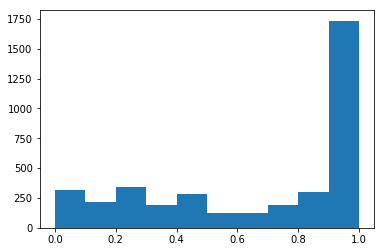

In [32]:
# histogram of booked rate across all properties
plt.hist(df_listings['booked'], bins = 10)

In [33]:
# add a flag to indicate if the property was booked > 0.9% of time  
df_listings['Mostly_booked'] = df_listings['booked'].apply(lambda x: x > 0.9)

In [34]:
df_listings['Mostly_booked'].value_counts()

False    2084
True     1734
Name: Mostly_booked, dtype: int64

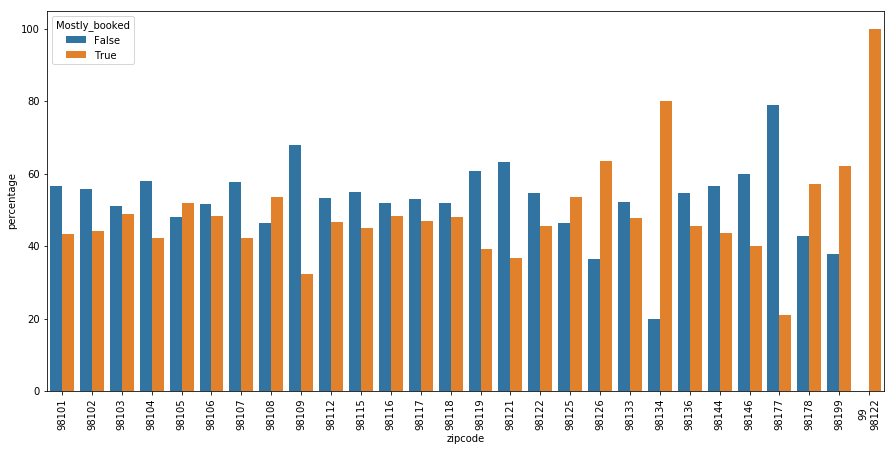

In [35]:
## Check how many properties are booked > 90% of the time by location
booked_by_counts = (df_listings.groupby(['zipcode'])['Mostly_booked']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('zipcode'))
plt.figure(figsize=(15,7))
p = sns.barplot(x="zipcode", y="percentage", hue="Mostly_booked", data=booked_by_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [36]:
# Create subset of data with neighbourhoods where mostly booked between 40 and 45 %
zip_groups = df_listings.groupby(['zipcode'])['Mostly_booked'].value_counts(normalize=True)
mask = (zip_groups.loc[:,True]>=0.4)&(zip_groups.loc[:,True]<=0.45)
zip_subset=[ix for ix in mask.index if mask[ix]==True]
print('Total zipcodes in subset: ', len(zip_subset))

Total zipcodes in subset:  7


In [37]:
df_subset = df_listings[df_listings['zipcode'].apply(lambda x: x in zip_subset)]

(array([ 123.,   64.,  120.,   55.,   78.,   38.,   33.,   61.,  104.,  522.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

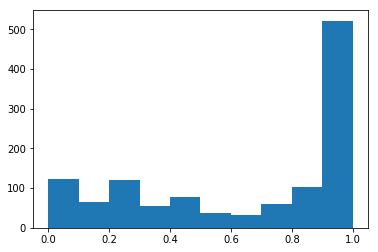

In [38]:
plt.hist(df_subset['booked'])

In [39]:
df_subset['zipcode'].value_counts()

98102    339
98101    201
98144    200
98107    180
98115    178
98104     95
98146      5
Name: zipcode, dtype: int64

### Analyze the univariate relationship between categorical variables and property popularity

#### Does the host status as superhost contribute to property popularity?

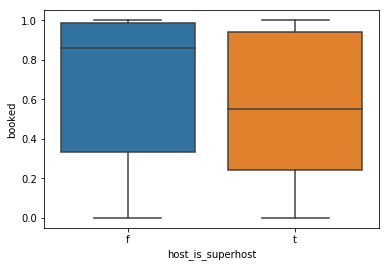

In [40]:
# source https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners

sns.boxplot(x="host_is_superhost", y="booked", data=df_subset);

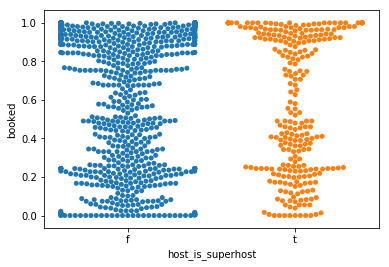

In [41]:
sns.swarmplot(x="host_is_superhost", y="booked", data=df_subset);

In [42]:
# Source https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
df_listings.groupby('host_is_superhost')['Mostly_booked'].value_counts(normalize=True)

host_is_superhost  Mostly_booked
f                  False            0.537854
                   True             0.462146
t                  False            0.575835
                   True             0.424165
Name: Mostly_booked, dtype: float64

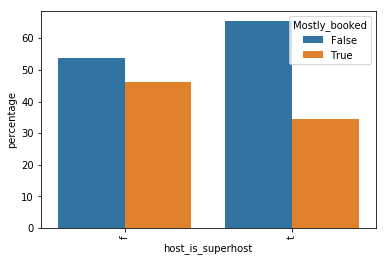

In [43]:
booked_by_superhost_counts = (df_subset.groupby(['host_is_superhost'])['Mostly_booked']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('host_is_superhost'))
p = sns.barplot(x="host_is_superhost", y="percentage", hue="Mostly_booked", data=booked_by_superhost_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

#### Looks like the host status as superhost is negatively correlated with the populartiy of the property. 42% of properties listed by superhost are popular vs. 46% that are listed by non-superhosts.

#### Does the cancellation policy impact the property popularity?

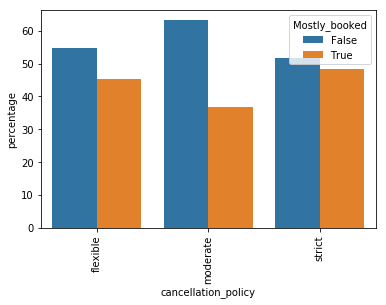

In [44]:
booked_by_counts = (df_subset.groupby(['cancellation_policy'])['Mostly_booked']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('cancellation_policy'))
p = sns.barplot(x="cancellation_policy", y="percentage", hue="Mostly_booked", data=booked_by_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

#### Seems like mostly booked properties have more strict cancellation policy

### Correlation analysis between numeric columns and response (popularty) variable

In [45]:
tf_map = {False:0, True:1}
df_listings['Mostly_booked']= df_listings['Mostly_booked'].map(tf_map)

In [46]:
df_subset['Mostly_booked'].value_counts()

False    676
True     522
Name: Mostly_booked, dtype: int64

In [47]:
num_cols.append('Mostly_booked')

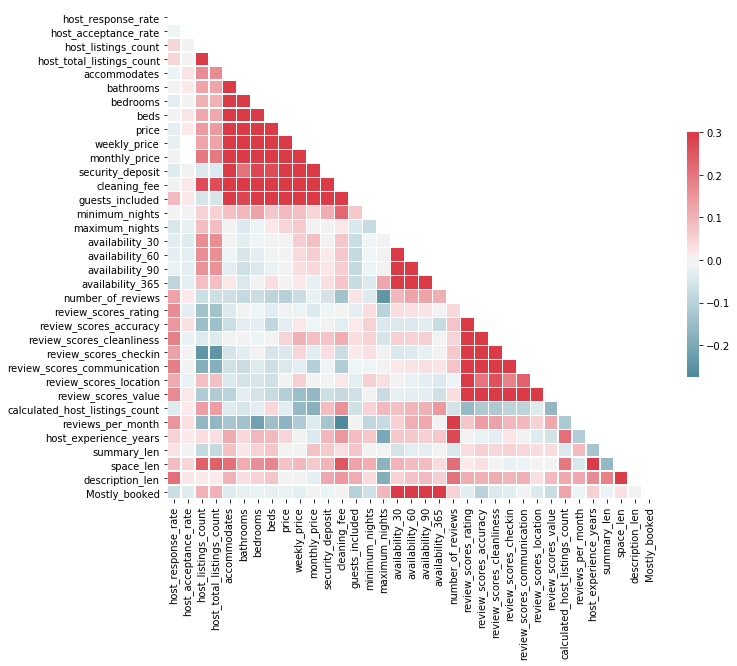

In [48]:
# ref https://www.kaggle.com/yogi045/how-to-become-top-earner-in-airbnb
corr = df_subset[num_cols].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
corr['Mostly_booked']

host_response_rate               -0.071994
host_acceptance_rate             -0.035247
host_listings_count               0.103461
host_total_listings_count         0.103461
accommodates                     -0.035308
bathrooms                        -0.024313
bedrooms                         -0.019496
beds                             -0.024100
price                            -0.021761
weekly_price                     -0.030905
monthly_price                    -0.009088
security_deposit                 -0.016730
cleaning_fee                      0.006132
guests_included                  -0.105315
minimum_nights                   -0.062031
maximum_nights                    0.094163
availability_30                   0.564563
availability_60                   0.631494
availability_90                   0.654152
availability_365                  0.790885
number_of_reviews                 0.052275
review_scores_rating             -0.032325
review_scores_accuracy           -0.101266
review_scor

In [50]:
#Negative correlation
corr[corr['Mostly_booked']<-0.07]['Mostly_booked']

host_response_rate       -0.071994
guests_included          -0.105315
review_scores_accuracy   -0.101266
review_scores_value      -0.071290
Name: Mostly_booked, dtype: float64

In [51]:
#Positive correlation
corr[corr['Mostly_booked']>0.1]['Mostly_booked']

host_listings_count               0.103461
host_total_listings_count         0.103461
availability_30                   0.564563
availability_60                   0.631494
availability_90                   0.654152
availability_365                  0.790885
calculated_host_listings_count    0.124825
Mostly_booked                     1.000000
Name: Mostly_booked, dtype: float64

#### I did not see strong correlation between property popularity and numberic variables besides availability. We should not use these variables for the anlaysis since they mostly indicate how much property is booked.

#### I will look at some variables that have weaker positive and negative correlation to understand the relationship better

Average listings counts by populartiy group 
 Mostly_booked
False    2.202663
True     3.500000
Name: calculated_host_listings_count, dtype: float64
Average % of popular properties by listing counts 
 calculated_host_listings_count
1     0.424528
2     0.368984
3     0.411215
4     0.512195
5     0.411765
6     0.687500
7     0.750000
8     0.500000
9     0.166667
11    1.000000
12    0.666667
15    0.562500
18    1.000000
31    0.500000
34    0.500000
37    0.923077
Name: Mostly_booked, dtype: float64


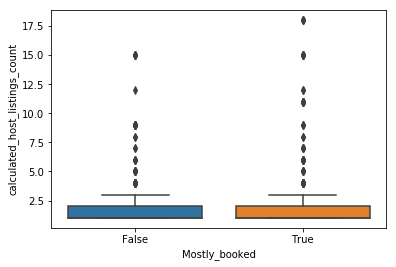

In [52]:
# There are few outliers that may be skewing the correlation. 
# We can consider calculated host listing counts column that is normalized
print ('Average listings counts by populartiy group \n', df_subset.groupby('Mostly_booked')['calculated_host_listings_count'].agg('mean'))
print ('Average % of popular properties by listing counts \n', df_subset.groupby('calculated_host_listings_count')['Mostly_booked'].agg('mean'))
sns.boxplot(x="Mostly_booked", y="calculated_host_listings_count", data=df_subset[df_subset['calculated_host_listings_count']<30]);

#### While the average number of host listings is higher among popular properties, the relationship is not monotonic, so we can not conclude that the more properties the host owns, the higher the change the property will be booked > 90% of the time

#### Another variable I would like to explore is host experience in years.

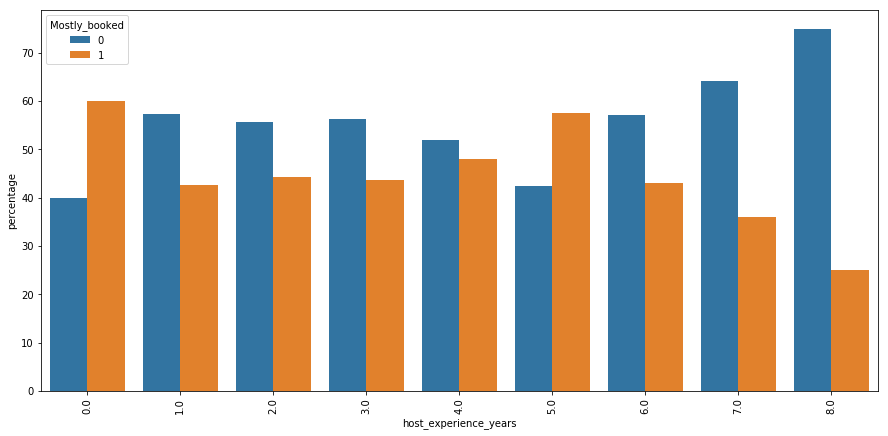

In [53]:
booked_by_counts = (df_listings.groupby(['host_experience_years'])['Mostly_booked']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('host_experience_years'))
plt.figure(figsize=(15,7))
p = sns.barplot(x="host_experience_years", y="percentage", hue="Mostly_booked", data=booked_by_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

#### The new hosts with less the 1 year of experience have higher number of popular properties while this number decreases for hosts with more than 5 years. However, this relationship is not monotonic either, so I won't conclude that the more experieced hosts have less chances to offer popular property.

#### How about number of bedrooms or guests included?

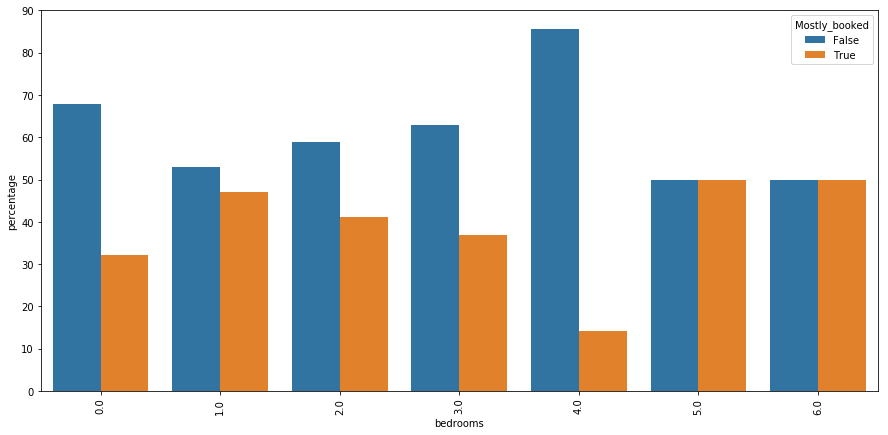

In [54]:
booked_by_counts = (df_subset.groupby(['bedrooms'])['Mostly_booked']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('bedrooms'))
plt.figure(figsize=(15,7))
p = sns.barplot(x="bedrooms", y="percentage", hue="Mostly_booked", data=booked_by_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [55]:
df_subset['bedrooms'].value_counts()

1.0    773
2.0    195
0.0    134
3.0     73
4.0     14
5.0      4
6.0      2
Name: bedrooms, dtype: int64

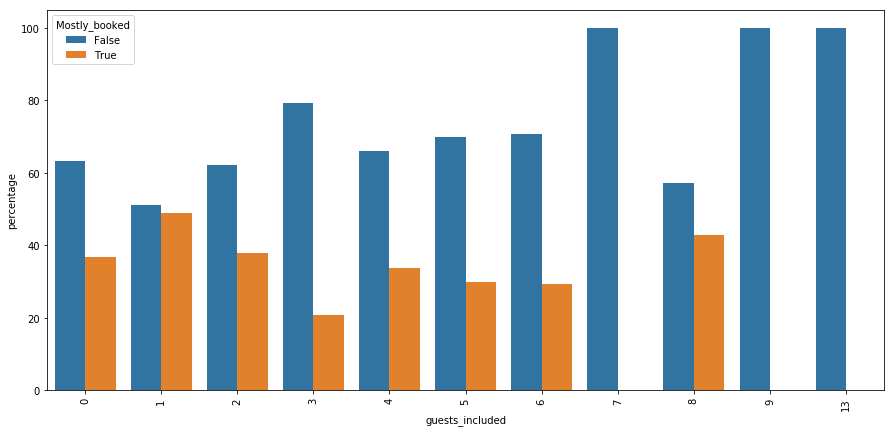

In [56]:
booked_by_counts = (df_subset.groupby(['guests_included'])['Mostly_booked']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('guests_included'))
plt.figure(figsize=(15,7))
p = sns.barplot(x="guests_included", y="percentage", hue="Mostly_booked", data=booked_by_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [57]:
df_subset['guests_included'].value_counts()

1     719
2     323
4      65
0      30
3      24
6      17
5      10
8       7
13      1
9       1
7       1
Name: guests_included, dtype: int64

#### Since the number of properties with > 4 bedrooms and > 7 guests is very low, I excluded those categories. From the above charts I concluded that most popular are 1 and 2 bedroom properties and also properties that allow 0-2 guests. Note, since the number of properties with > 4 bedrooms and > 7 guests is very low, I did not consider those categories. 

#### Additional variables to consider is price and rating

Average price by popularity categories:  Mostly_booked
False    130.599112
True     126.685824
Name: price, dtype: float64


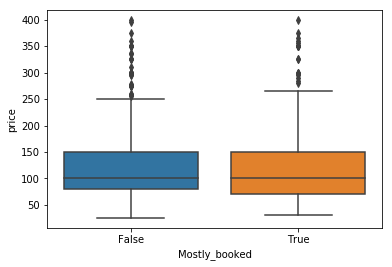

In [58]:
print('Average price by popularity categories: ', df_subset.groupby('Mostly_booked')['price'].agg('mean'))
sns.boxplot(x="Mostly_booked", y="price", data=df_subset[df_subset['price']<400]);

#### There is slight difference in price. The popular properties have little lower average price.

Average ratings by popularity categories:  Mostly_booked
False    94.547748
True     94.102975
Name: review_scores_rating, dtype: float64


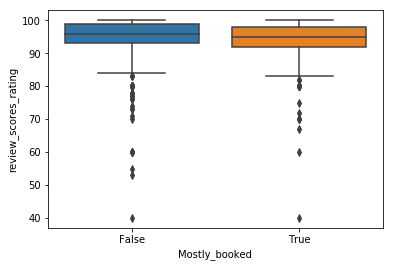

In [59]:
print('Average ratings by popularity categories: ', df_subset.groupby('Mostly_booked')['review_scores_rating'].agg('mean'))
sns.boxplot(x="Mostly_booked", y="review_scores_rating", data=df_subset);

#### As expected based on correlation analysis results, the review ratings does not impact the property popularity

Average space description length by popularity categories:  Mostly_booked
False    603.369838
True     624.101996
Name: space_len, dtype: float64


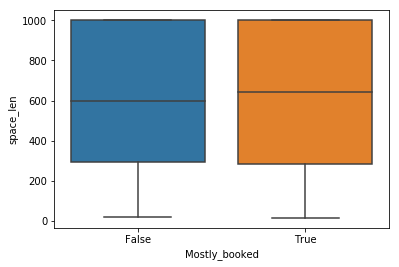

In [60]:
print('Average space description length by popularity categories: ', df_subset.groupby('Mostly_booked')['space_len'].agg('mean'))
sns.boxplot(x="Mostly_booked", y="space_len", data=df_subset);

#### There is a slight difference in average length of space description for popular properties listed with more verbose description. However, NLP analysis will be more helpful to see if there are any popular words in descriptions that increase the chance of properties booked. 

## 6. Evaluation


### 6.1. What is the main factor impacting property occupancy rate?



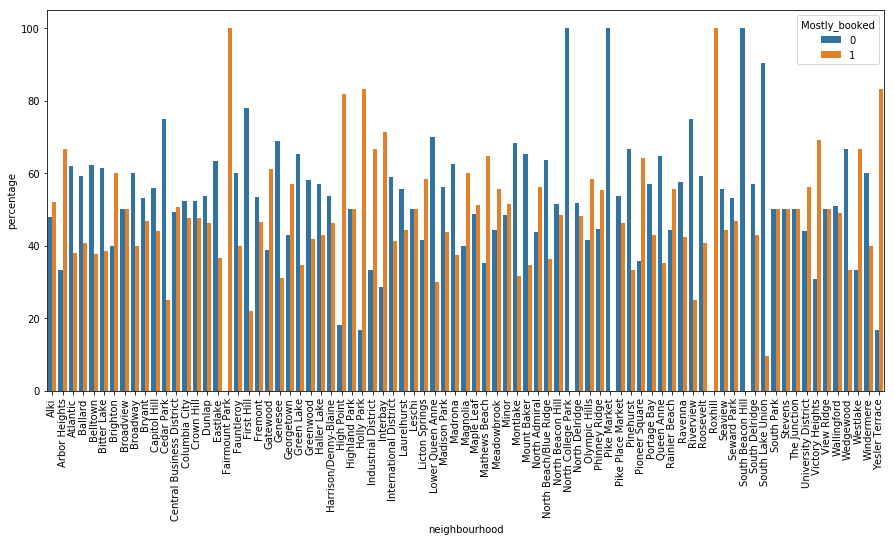

In [61]:
booked_by_counts = (df_listings.groupby(['neighbourhood'])['Mostly_booked']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('neighbourhood'))
plt.figure(figsize=(15,7))
p = sns.barplot(x="neighbourhood", y="percentage", hue="Mostly_booked", data=booked_by_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

The location plays major role in property popularity. For instance, more than 80% of properties in High point are booked > 90% of the time while only 25% of properties in River view booked > 90% of the time. If we continue analysis on across all neighbourhoods, the location may skew the results.

Since my friend's apartment is in a zipcode that has only 43% of properties that are popular, I will select similar neighbourhoods for further analysis.

### 6.2. How do price and property rating imact the property occupancy?

Average price by popularity categories:  Mostly_booked
False    130.599112
True     126.685824
Name: price, dtype: float64


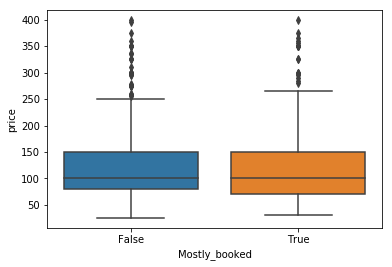

In [62]:
print('Average price by popularity categories: ', df_subset.groupby('Mostly_booked')['price'].agg('mean'))
sns.boxplot(x="Mostly_booked", y="price", data=df_subset[df_subset['price']<400]);

#### There is slight difference in price. The popular properties have little lower average price.

Average ratings by popularity categories:  Mostly_booked
False    94.547748
True     94.102975
Name: review_scores_rating, dtype: float64


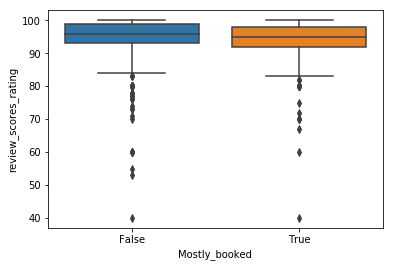

In [63]:
print('Average ratings by popularity categories: ', df_subset.groupby('Mostly_booked')['review_scores_rating'].agg('mean'))
sns.boxplot(x="Mostly_booked", y="review_scores_rating", data=df_subset);

#### As expected based on correlation analysis results, the review ratings does not impact the property popularity

### 6.3. What are additional factors that need to be considered to increase property occupancy?

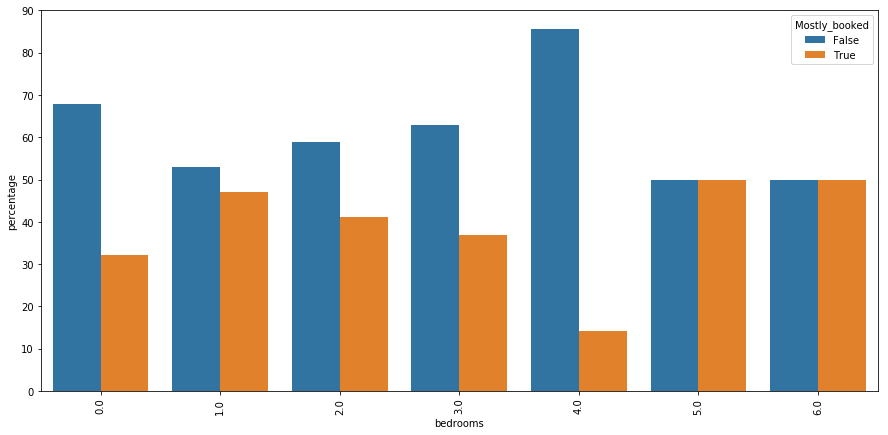

In [64]:
# Number of bedrooms
booked_by_counts = (df_subset.groupby(['bedrooms'])['Mostly_booked']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('bedrooms'))
plt.figure(figsize=(15,7))
p = sns.barplot(x="bedrooms", y="percentage", hue="Mostly_booked", data=booked_by_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

Based on the chart above, 1 berooms properties are most popular followed by 2 and 3 bedroom properties. There are only few properties with 5 and 6 bedrooms, so I won't take them into account.

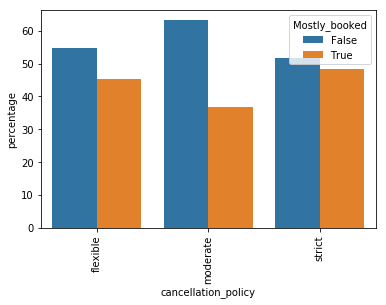

In [65]:
# Cancelation policy
booked_by_counts = (df_subset.groupby(['cancellation_policy'])['Mostly_booked']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('cancellation_policy'))
p = sns.barplot(x="cancellation_policy", y="percentage", hue="Mostly_booked", data=booked_by_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

#### Seems like mostly booked properties have more strict cancellation policy

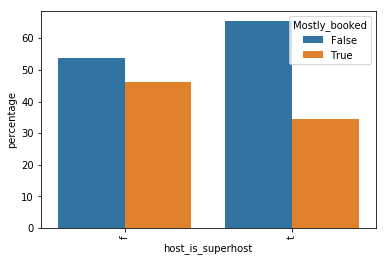

In [66]:
booked_by_superhost_counts = (df_subset.groupby(['host_is_superhost'])['Mostly_booked']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('host_is_superhost'))
p = sns.barplot(x="host_is_superhost", y="percentage", hue="Mostly_booked", data=booked_by_superhost_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

#### Looks like the host status as superhost is negatively correlated with the populartiy of the property. 42% of properties listed by superhost are popular vs. 46% that are listed by non-superhosts.

To conclude, if you want to invest into a property and use it as a rental income, choose the location carefully. If you have an existing property or can’t afford a popular location, then take number of bedrooms into consideration and carefully plan the cancellation policy not to take a hit of potential renters cancelling at the last minute. Additionally, while setting the right price and keeping the property ratings high is important, you can’t rely on those factors along to have your property consistently booked. Similarly, do not worry if you don’t have a super-host badge. 